In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
import tensorflow as tf
import matplotlib.pyplot as plt

## Introducción a tensores

- Tensor

In [2]:
tensor = tf.constant(4)
tensor

<tf.Tensor: shape=(), dtype=int32, numpy=4>

- Vector

In [3]:
tensor = tf.constant([3, 4, 5])
tensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

- Obtener dimensión de tensor con __shape__

In [4]:
tensor.shape

TensorShape([3])

- Tensor de 2 dimensiones

In [5]:
tensor = tf.constant([[3, 4, 5], [3, 4, 5]])
tensor, tensor.shape

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[3, 4, 5],
        [3, 4, 5]], dtype=int32)>,
 TensorShape([2, 3]))

- Ejercicio: Crear un tensor de $3 \times 3 \times 2 \times 1$

### Operaciones de tensores

In [6]:
tensor = tf.constant([[3, 4], [3, 4]])

In [7]:
tensor + tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6, 8],
       [6, 8]], dtype=int32)>

In [8]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9, 16],
       [ 9, 16]], dtype=int32)>

- Multiplicación de matrices con __@__

In [9]:
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[21, 28],
       [21, 28]], dtype=int32)>

### Métodos de tensores

- Inicialización en ceros. Pasar como argumento la dimensión del tensor

In [10]:
tensor = tf.zeros([3, 3, 9])
tensor.shape

TensorShape([3, 3, 9])

- Método __reshape__

In [11]:
tf.reshape(tensor, [9, 9])

<tf.Tensor: shape=(9, 9), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

- Cast de tensores

In [12]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: shape=(3, 3, 9), dtype=uint8, numpy=
array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]], dtype=uint8)>

- Método __range__

In [13]:
tf.range(4, 8)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 5, 6, 7], dtype=int32)>

### Cadenas en tensores

In [14]:
tf.constant(['Hola como estas'])

<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Hola como estas'], dtype=object)>

- Listas de cadenas

In [15]:
string = tf.constant(['Hola como estas',
                      'Bien y tu?',
                      'Que haciendo?'])

string[0], string[2]

(<tf.Tensor: shape=(), dtype=string, numpy=b'Hola como estas'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Que haciendo?'>)

## Importar dataset

In [16]:
import tensorflow_datasets as tfds

In [17]:
dataset = tfds.load('imdb_reviews', as_supervised=True)

In [18]:
raw_train_ds, raw_test_ds = dataset['train'], dataset['test']

In [19]:
for text, label in raw_train_ds.take(1):
    print(text.numpy(), label.numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 0


## Preparar dataset

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BUFFER_SIZE = tf.data.experimental.cardinality(raw_train_ds)
BUFFER_SIZE.numpy()

25000

In [21]:
batch_size = 16
voc_size = 5000
seq_length = 20

train_ds = raw_train_ds.shuffle(BUFFER_SIZE).batch(
        batch_size, num_parallel_calls=AUTOTUNE).prefetch(
        AUTOTUNE)


test_ds = raw_test_ds.batch(
        batch_size, num_parallel_calls=AUTOTUNE).prefetch(
        AUTOTUNE)

In [22]:
for i in train_ds.take(1):
    print(i)

(<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'I could not agree more with the quote "this is one of the best films ever made." If you think Vanilla Sky is simply a "re-make," you could not be more wrong. There is tremendous depth in this film: visually, musically, and emotionally.<br /><br />Visually, because the film is soft and delicate at times (early scenes with Sofia) and at other times powerful and intense (Times Square, post-climactic scenes).<br /><br />The music and sounds tie into this movie so perfectly. Without the music, the story is only half told. Nancy Wilson created an emotional, yet eclectic, score for the film which could not be more suitable for such a dream-like theme (although never released, I was able to get my hands on the original score for about $60. If you look hard, you may be able to find a copy yourself). Crowe\'s other musical selections, such as The Beach Boys, Josh Rouse, Spiritualized, Sigur Ros, the Monkees, etcetera etcetera, are also perf

## Definir modelo

In [23]:
from tensorflow.keras.layers import TextVectorization

In [24]:
def clean_text(raw_text):
    lowercase = tf.strings.lower(raw_text)
    clean = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return clean

vectorize_layer = TextVectorization(
    standardize=clean_text,
    max_tokens=voc_size,
    output_mode='int',
    output_sequence_length=seq_length)

- Adaptar la capa

In [25]:
vectorize_layer_ds = train_ds.map(lambda text, label: text)
vectorize_layer.adapt(vectorize_layer_ds)

In [26]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'a',
 'and',
 'of',
 'to',
 'is',
 'in',
 'i',
 'this',
 'that',
 'it',
 'was',
 'as',
 'for',
 'with',
 'but',
 'on',
 'movie',
 'his',
 'not',
 'are',
 'film',
 'you',
 'have',
 'he',
 'be',
 'at',
 'one',
 'by',
 'an',
 'they',
 'all',
 'from',
 'who',
 'like',
 'so',
 'just',
 'or',
 "it's",
 'has',
 'her',
 'about',
 'if',
 'some',
 'what',
 'out',
 'there',
 'when',
 'very',
 'more',
 'she',
 'even',
 'my',
 'would',
 'good',
 'only',
 'no',
 'their',
 'really',
 'had',
 'which',
 'can',
 'up',
 'were',
 'see',
 'than',
 'we',
 '-',
 'been',
 'into',
 'get',
 'will',
 'much',
 'because',
 'story',
 'most',
 'how',
 'other',
 'first',
 'also',
 "don't",
 'its',
 'do',
 'time',
 'great',
 'me',
 'people',
 'make',
 'could',
 'any',
 'after',
 'then',
 'made',
 'bad',
 'think',
 'many',
 'being',
 'it.',
 'him',
 'never',
 'two',
 'too',
 'little',
 'where',
 'movie.',
 'well',
 'way',
 'watch',
 'your',
 'did',
 'does',
 'best',
 'them',
 'seen',
 'know',
 '

- Probar vectorize_layer con batch de prueba

In [27]:
test_batch = tf.constant([['Hi there']])
vectorize_layer(test_batch)

<tf.Tensor: shape=(1, 20), dtype=int64, numpy=
array([[ 1, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])>

![alt text](../img/rnn.png "Title")
__Imagen tomada de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.__

In [28]:
rnn = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=voc_size, output_dim=128),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(1)
])

- Probar rnn con batch de prueba

In [29]:
rnn(test_batch)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00087483]], dtype=float32)>

- Información del modelo

In [30]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 20)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 20, 128)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 673,025
Trainable params: 673,025
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento 

- Compilar modelo con oprimizador y función de pérdida

In [31]:
rnn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer='sgd',
            metrics=['accuracy'])

In [32]:
epochs = 3

In [33]:
history = rnn.fit(train_ds, 
                  validation_data=test_ds,
                  epochs=epochs)

Epoch 1/3
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6908 - accuracy: 0.5034 - val_loss: 0.6863 - val_accuracy: 0.5181
Epoch 2/3
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6742 - accuracy: 0.5349 - val_loss: 0.6715 - val_accuracy: 0.5324
Epoch 3/3
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6537 - accuracy: 0.5779 - val_loss: 0.6644 - val_accuracy: 0.5475


In [34]:
history.history

{'loss': [0.6908324956893921, 0.674217939376831, 0.6536896228790283],
 'accuracy': [0.5034000277519226, 0.5348799824714661, 0.5779200196266174],
 'val_loss': [0.6863126754760742, 0.6715361475944519, 0.6644060015678406],
 'val_accuracy': [0.5180799961090088, 0.5324400067329407, 0.5474799871444702]}

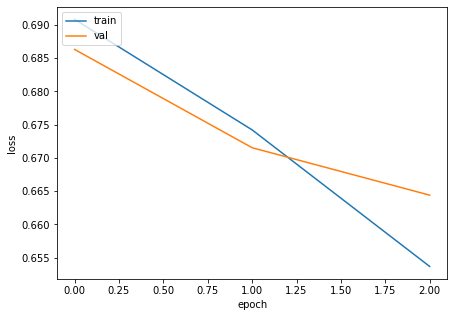

In [35]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

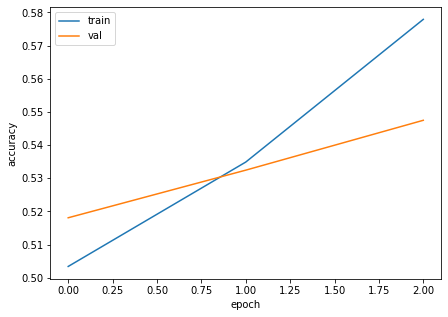

In [36]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- Ejemplos tf.data https://www.tensorflow.org/guide/data